<a href="https://colab.research.google.com/github/madhuselvaraj/GenderNet/blob/master/GenderNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing mtcnn and opencv

In [1]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python==3.2.0.8

     |████████████████████████████████| 2.3MB 39.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn
     |████████████████████████████████| 13.3MB 31.9MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [0]:
import os
import matplotlib.pyplot as plt

from mtcnn.mtcnn import MTCNN
import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np

from tensorflow.keras.layers import Input,Dense,MaxPooling2D,BatchNormalization,Dropout,Flatten,Conv2D,Activation
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [153]:
from google.colab import files

uploaded = files.upload()

Saving timesnewarial.ttf to timesnewarial.ttf


#Training and Validation

Create directories for training and validation  and upload training and validation images.

------> **train_images**

              ---->man
              
              ---->woman
              
-------> **validation_images**

              ---->man
              
              ---->woman

In [0]:
os.mkdir("/content/train_images")
os.mkdir("/content/train_images/man")
os.mkdir("/content/train_images/woman")
os.mkdir("/content/validation_images")
os.mkdir("/content/validation_images/man")
os.mkdir("/content/validation_images/woman")

**model**  

1st -> convolution  ->activation ->pooling  ->normalization  
      
 2nd -> convolution  ->activation ->pooling ->normalization  
      
 3rd -> convolution ->activation ->pooling ->normalization
      
 4th-> dense layer ->dropout
 
 5th-> dense layer ->dropout
 
 6th-> softmax
 
 Input will be (227,227) array of images and it outputs 2 neurons 

In [0]:
def genderpred_model(input_shape):
  
  X_input = Input(input_shape)

  X = Conv2D(96, (7, 7), strides = (4, 4), name = 'conv1')(X_input)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), name='max_pool1')(X)
  X = BatchNormalization(axis = 3, name = 'bn1')(X)  

  X = Conv2D(256, (5, 5), strides = (1, 1), padding = "same",name = 'conv2')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), name='max_pool2')(X)
  X = BatchNormalization(axis = 3, name = 'bn2')(X)
  
  X = Conv2D(256, (3, 3), strides = (1, 1), padding = "same",name = 'conv3')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2, 2), name='max_pool3')(X)
  X = BatchNormalization(axis = 3, name = 'bn3')(X)
  
  X = Flatten()(X)
  
  X = Dense(512, activation='relu', name='fc1')(X)
  X = Dropout((0.5))(X)
  
  X = Dense(512, activation='relu', name='fc2')(X)
  X = Dropout((0.5))(X)
      
  X = Dense(2, activation='softmax', name='fc3')(X)

  model = Model(inputs = X_input, outputs = X, name='genderpredModel')
  
  return model

In [0]:
genderpred = genderpred_model((227,227,3))

In [57]:
genderpred.summary()

Model: "genderpredModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 227, 227, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 56, 56, 96)        14208     
_________________________________________________________________
activation_9 (Activation)    (None, 56, 56, 96)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 28, 28, 96)        0         
_________________________________________________________________
bn1 (BatchNormalization)     (None, 28, 28, 96)        384       
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 256)       614656    
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 256)   

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train_images',
        target_size=(227, 227),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        '/content/validation_images',
        target_size=(227, 227),
        batch_size=32,
        class_mode='categorical')


Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [0]:
genderpred.compile(optimizer = Adam(lr=0.00001), loss="categorical_crossentropy", metrics=['accuracy'])

In [59]:
fit_model = genderpred.fit_generator(
        train_generator,
        steps_per_epoch=43,
        epochs=11,
        validation_data=validation_generator,
        validation_steps=6
)

Epoch 1/11
43/43 [==============================] - 15s 341ms/step - loss: 1.0011 - acc: 0.5826 - val_loss: 0.7001 - val_acc: 0.4948
Epoch 2/11
43/43 [==============================] - 14s 331ms/step - loss: 0.7746 - acc: 0.6762 - val_loss: 0.7242 - val_acc: 0.4948
Epoch 3/11
43/43 [==============================] - 14s 330ms/step - loss: 0.6791 - acc: 0.7113 - val_loss: 0.7138 - val_acc: 0.4948
Epoch 4/11
43/43 [==============================] - 14s 328ms/step - loss: 0.5762 - acc: 0.7507 - val_loss: 0.6829 - val_acc: 0.5052
Epoch 5/11
43/43 [==============================] - 14s 326ms/step - loss: 0.5375 - acc: 0.7741 - val_loss: 0.6612 - val_acc: 0.5729
Epoch 6/11
43/43 [==============================] - 14s 325ms/step - loss: 0.5006 - acc: 0.7770 - val_loss: 0.6283 - val_acc: 0.7240
Epoch 7/11
43/43 [==============================] - 14s 325ms/step - loss: 0.4790 - acc: 0.7887 - val_loss: 0.5975 - val_acc: 0.7500
Epoch 8/11
43/43 [==============================] - 14s 331ms/step - 

training accuracy :83%

validation accuracy:80%

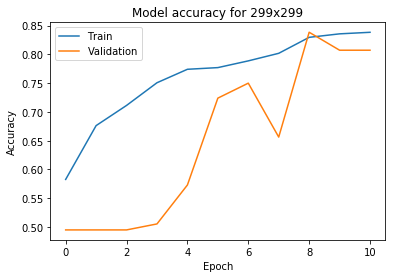

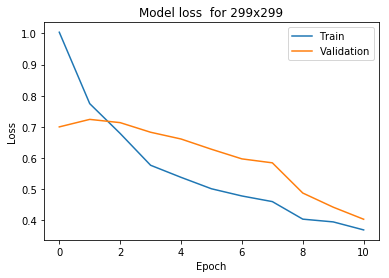

In [60]:
plt.plot(fit_model.history['acc'])
plt.plot(fit_model.history['val_acc'])
plt.title('Model accuracy for 299x299')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


plt.plot(fit_model.history['loss'])
plt.plot(fit_model.history['val_loss'])
plt.title('Model loss  for 299x299')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#Testing

preprocessing  the  image.

Input: array of test image, path/ location of the image , model as object

Output : prediction

In [0]:
def pred_test_images(test_image,path,model):
  
  pred_test = []
  
  for i in range(len(test_image)):
    
    #load an image with shape(227,227)
    image = load_img(path+test_image[i], target_size=(227, 227))

    #converting an image to array
    image = img_to_array(image)

    #reshape it into (1,224,224,3)
    image_reshape = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    #prediction
    label = model.predict(image_reshape)
    
    pred_test.append(label)
    
  return pred_test

crops the faces in  the input image and save it in the spacified path.

Input : image, Path of the image , size to be cropped(i.e )227 here

Output : list of croped images

In [0]:
def crop_image(img,path,size):
  
  image = cv2.imread(path+"/"+img)
  detector = MTCNN()
  output = detector.detect_faces(image)
  
  crop_img = Image.open(path+"/"+img)
  crop_images = []  
  for i in range(len(output)):
    
    box = output[i]["box"]
    crop = crop_img.crop(box=(box[0],box[1],(box[0]+box[2]) ,(box[1]+box[3])))
    crop = crop.resize((size, size),Image.ANTIALIAS)
    crop.save(path+"/crop_"+str(i)+img,"JPEG")
    crop_images.append("crop_"+str(i)+img) 
  return crop_images,output

predict whether its a man or woman. 

This function combines **crop_image**() and **pred_test_images**() functions.

Input : test  image, model

Output: dictionary with image name as key and prediction as value

In [0]:
def predict_crop_img(new_image,model):
  
  crop_images,output_boxes = crop_image(img = new_image,path = "/content/",size =227 )    
  pred_own = pred_test_images(test_image = crop_images,path = "/content/",model = model)
  
  text = {}
  for i in range(len(pred_own)):
    
    if pred_own[i][0][0] >= 0.5:
      result = "man"
    if pred_own[i][0][1] >= 0.5:
      result = "women"
      
    text[i] = result
    
  duplicate_image = draw_box(output_boxes,new_image,text)
  
  return text,duplicate_image

draw boxes with text label and save it the duplicate one.

Input : box index, image,prediction (man/woman)

Output :  returns the predicted image 

In [0]:
def draw_box(boxes,img,text_predict):
  
  font =ImageFont.truetype("timesnewarial.ttf",20)
  colour = ["red","blue","yellow","orange","green","brown"]
  image = Image.open(img)
  draw = ImageDraw.Draw(image)
    
  for i in range(len(boxes)):

    box = boxes[i]["box"]
    draw.rectangle([(box[0],box[1]),(box[0]+box[2] , box[1]+box[3])],outline = colour[i])
    draw.text((box[0],box[1] -21 ),text_predict[i],fill = colour[i],font = font)
  image.save("duplicate_"+img)
  duplicate_img = "duplicate_"+img
  
  return duplicate_img

uploading a new image 

In [247]:
from google.colab import files

uploaded = files.upload()

Saving friends.jpg to friends.jpg


In [248]:
prediction,d_images = predict_crop_img(new_image = "friends.jpg",model = genderpred)
print(prediction)

{0: 'women', 1: 'women', 2: 'women'}


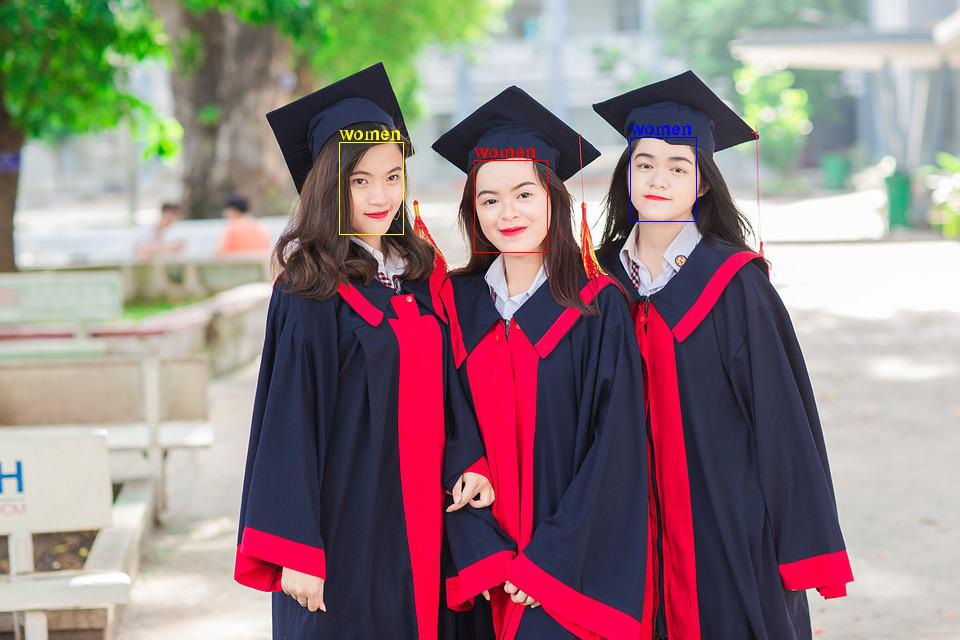

In [249]:
Image.open(d_images)